In [1]:
import matplotlib.pyplot as plt


def show_image(image, title="Image", cmap_type="gray"):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [2]:
import matplotlib.pyplot as plt


def plot_comparison(
    original, filtered, title_filtered, title_original="Original", sz=(10, 8)
):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=sz, sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(title_original)
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")

In [3]:
from skimage import color
from skimage import data
import numpy as np
from skimage.filters import gaussian

# 14. Edge Detection

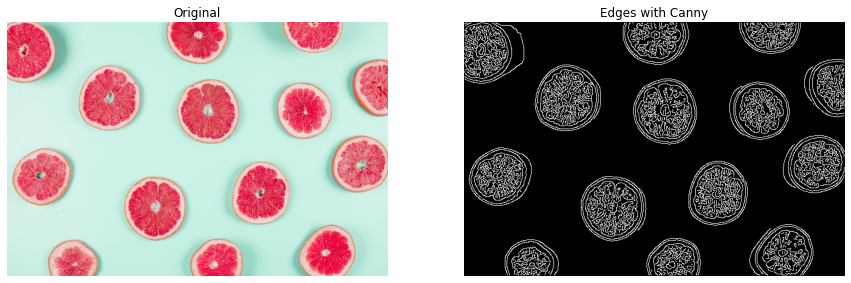

In [4]:
# Import the canny edge detector
from skimage.feature import canny

grapefruit = plt.imread("images/grapefruit.jpg")
# show_image(grapefruit, "Original Image")
# Convert image to grayscale
grapefruit_gray = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit_gray)

# show_image(grapefruit, "Grayscale Image")

# # Show resulting image
# show_image(canny_edges, "Edges with Canny")
plot_comparison(grapefruit, canny_edges, "Edges with Canny", sz=(15, 15))

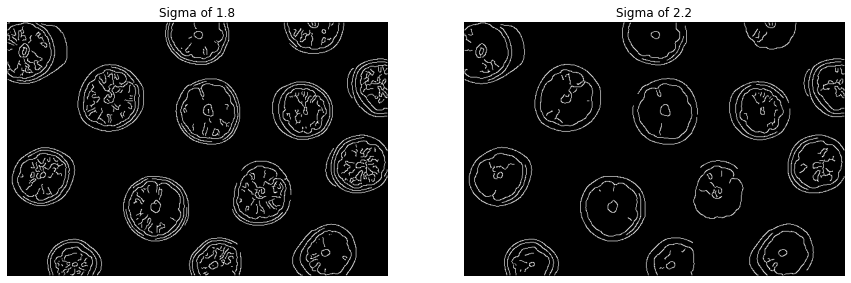

In [5]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit_gray, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit_gray, sigma=2.2)

# Show resulting images
# Default sigma=1 (gaussian filter) more value means more smoothening
# show_image(edges_1_8, "Sigma of 1.8")
# show_image(edges_2_2, "Sigma of 2.2")
plot_comparison(edges_1_8, edges_2_2, "Sigma of 2.2", "Sigma of 1.8", sz=(15, 15))

# 15. Corner Detection

In [6]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation="nearest", cmap="gray")
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], "+r", markersize=15)
    plt.axis("off")
    plt.show()

With a min_distance set to 2, we detect a total 98 corners in the image.
With a min_distance set to 40, we detect a total 36 corners in the image.


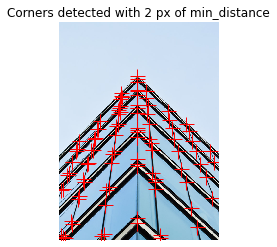

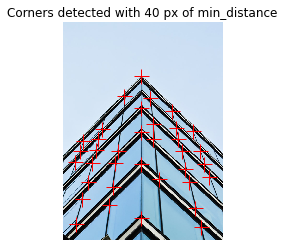

In [7]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

building_image = plt.imread("images/corners_building_top.jpg")
# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2, threshold_rel=0.1)
print(
    "With a min_distance set to 2, we detect a total",
    len(coords_w_min_2),
    "corners in the image.",
)

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40, threshold_rel=0.1)
print(
    "With a min_distance set to 40, we detect a total",
    len(coords_w_min_40),
    "corners in the image.",
)

# Show original and resulting image with corners detected
show_image_with_corners(
    building_image, coords_w_min_2, "Corners detected with 2 px of min_distance"
)
show_image_with_corners(
    building_image, coords_w_min_40, "Corners detected with 40 px of min_distance"
)

# 16. Face Detection

In [8]:
def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro = result[d["r"] : d["r"] + d["width"], d["c"] : d["c"] + d["height"]]
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)
        plt.title(title)
        plt.axis("off")
        plt.show()

In [9]:
import matplotlib.patches as patches


def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap("gray")
    plt.title(title)
    plt.axis("off")
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch["c"], patch["r"]),
                patch["width"],
                patch["height"],
                fill=False,
                color="r",
                linewidth=2,
            )
        )
    plt.show()
    crop_face(result, detected)

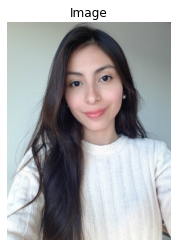

[{'r': 120, 'c': 188, 'width': 306, 'height': 306}]


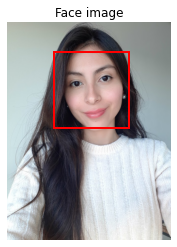

{'r': 120, 'c': 188, 'width': 306, 'height': 306}


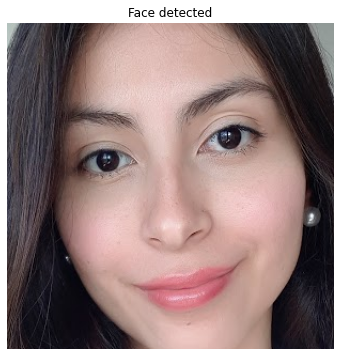

In [10]:
from skimage.feature import Cascade

# Load the trained file from data
rebeca = plt.imread("images/rebeca.jpg")
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(
    img=rebeca,
    scale_factor=1.2,
    step_ratio=1,
    min_size=(200, 200),
    max_size=(600, 600),
)

# Show the detected faces
show_image(rebeca)
print(detected)
show_detected_face(rebeca, detected)

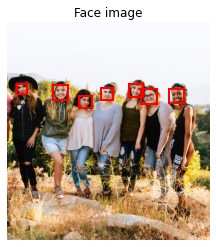

{'r': 202, 'c': 31, 'width': 35, 'height': 35}


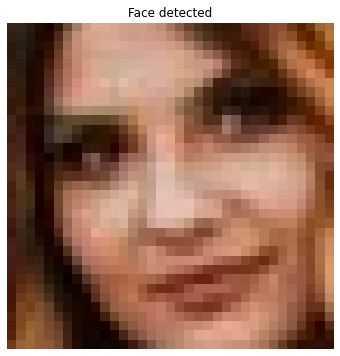

{'r': 217, 'c': 309, 'width': 39, 'height': 39}


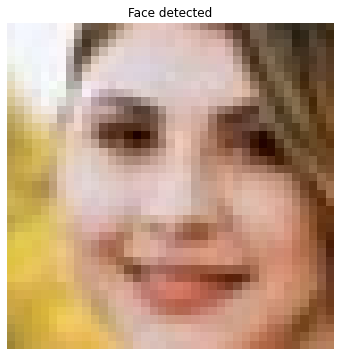

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


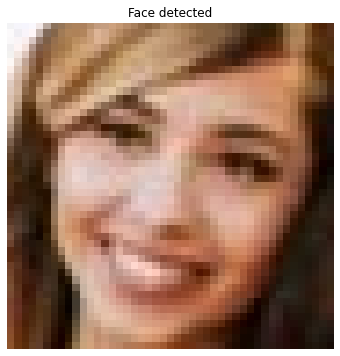

{'r': 206, 'c': 151, 'width': 49, 'height': 49}


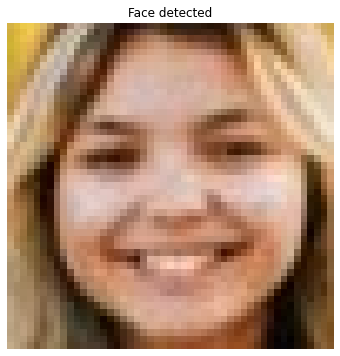

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


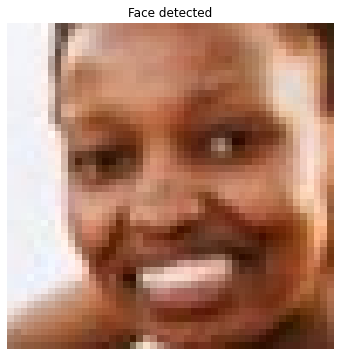

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


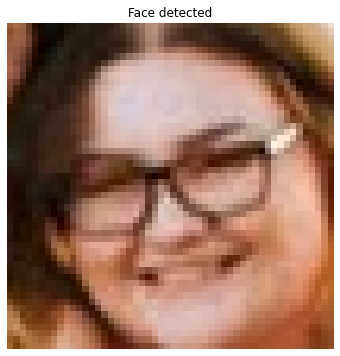

{'r': 241, 'c': 237, 'width': 42, 'height': 42}


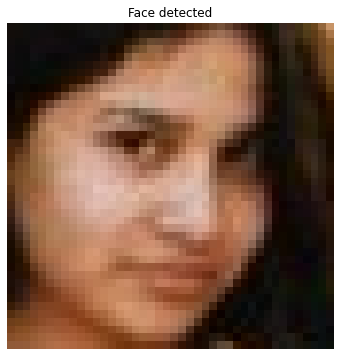

In [11]:
friends_image = plt.imread("images/friends_image.jpg")

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(
    img=friends_image,
    scale_factor=1.2,
    step_ratio=1,
    min_size=(10, 10),
    max_size=(200, 200),
)
# Show the detected faces
show_detected_face(friends_image, detected)

In [12]:
def mergeBlurryFace(original, gaussian_image):
    # X and Y starting points of the face rectangle
    x, y = d["r"], d["c"]
    # The width and height of the face rectangle
    width, height = d["r"] + d["width"], d["c"] + d["height"]
    original[x:width, y:height] = gaussian_image
    return original

In [13]:
def getFaceRectangle(d):
    """ Extracts the face from the image using the coordinates of the detected image """
    # X and Y starting points of the face rectangle
    x, y = d["r"], d["c"]
    # The width and height of the face rectangle
    width, height = d["r"] + d["width"], d["c"] + d["height"]
    # Extract the detected face
    face = group_image[x:width, y:height]
    return face

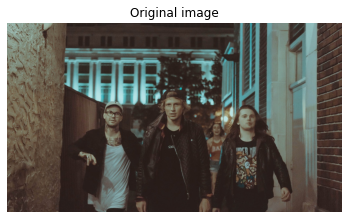

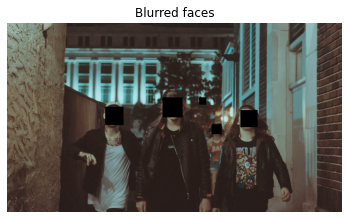

In [14]:
group_image = np.copy(plt.imread("images/group_image.jpg"))
show_image(group_image, "Original image")
# Detect the faces
detected = detector.detect_multi_scale(
    img=group_image,
    scale_factor=1.2,
    step_ratio=1,
    min_size=(10, 10),
    max_size=(100, 100),
)
# For each detected face
for d in detected:
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)

    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma=8)

    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face)
show_image(resulting_image, "Blurred faces")

In [15]:
# # Import the necessary modules
# from skimage.restoration import denoise_tv_chambolle, inpaint
# from skimage import transform

# damaged_image = plt.imread("images/damaged_image.png")
# # Transform the image so it's not rotated
# # upright_img = transform.rotate(damaged_image, 20)
# for i in range(3):
#     # Remove noise from the image, using the chambolle method
#     upright_img_without_noise = denoise_tv_chambolle(
#         damaged_image, weight=0.1, multichannel=True
#     )

#     # Reconstruct the image missing parts
#     mask = get_mask(damaged_image)
#     result = inpaint.inpaint_biharmonic(
#         upright_img_without_noise, mask, multichannel=True
#     )
#     damaged_image = result
# show_image(result)